In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Reason scaling some images before drawing it with matplotlib



> The reason is that if the color intensity is a float, then matplotlib expects it to range from 0 to 1. If an int, then it expects 0 to 255. So you can either force all the numbers to int or scale them all by 1/255.
[Clipping input data to the valid range for imshow with RGB data](https://stackoverflow.com/a/50185257)


## Problema 1

In [ ]:
def  get_image_in_channel(img, c):
  ### Dimensiones de la imagen.
  alto = img.shape[0]
  ancho = img.shape[1]
  img_out = np.zeros((alto, ancho, 3))
  filters = {
      1: [0, 0, 1],
      2: [0, 1, 0],
      3: [1, 0, 0],
      10: [1, 1, 0],
      20: [0, 1, 1],
      30: [1, 0, 1]
  }
  filter = np.array(filters.get(c))
 
  for i in range(0, alto):
    for j in range(0, ancho):
        img_out[i, j] =  img[i, j]/255 * filter
  return img_out

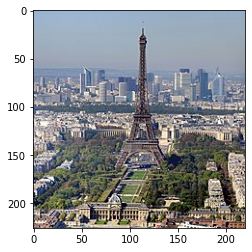

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/Lab1/paris.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

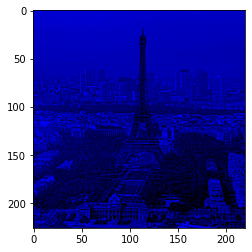

In [ ]:
img_b = get_image_in_channel(img, 1)
plt.imshow(img_b)

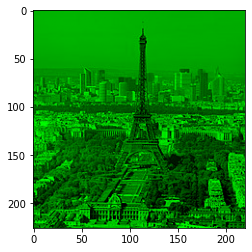

In [ ]:
img_b = get_image_in_channel(img, 2)
plt.imshow(img_b)

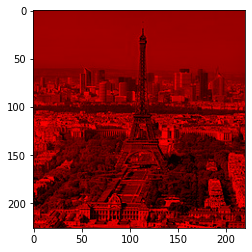

In [ ]:
img_b = get_image_in_channel(img, 3)
plt.imshow(img_b)

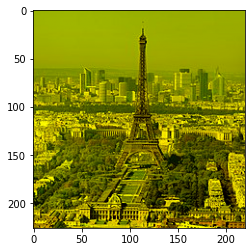

In [ ]:
img_b = get_image_in_channel(img, 10)
plt.imshow(img_b)

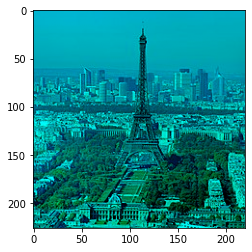

In [ ]:
img_b = get_image_in_channel(img, 20)
plt.imshow(img_b)

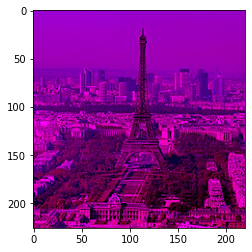

In [ ]:
img_b = get_image_in_channel(img, 30)
plt.imshow(img_b)

## Problema 2

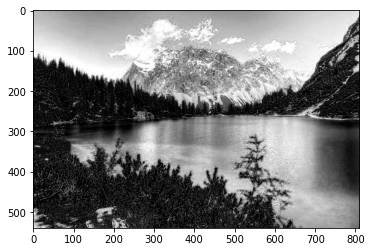

In [ ]:
img_b = cv2.imread('/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/Lab1/imagen1/imagen1_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_b, cmap="gray")

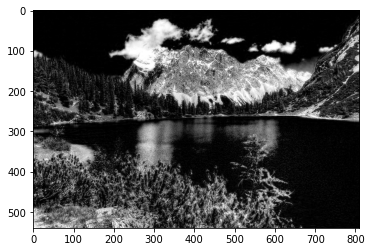

In [ ]:
img_r = cv2.imread('/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/Lab1/imagen1/imagen1_salida_gray_rojo.jpg', 0)
plt.imshow(img_r, cmap="gray")

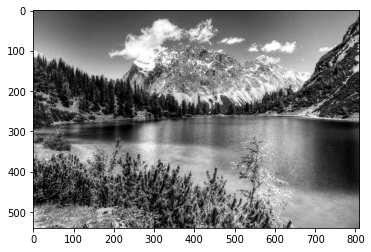

In [ ]:
img_g = cv2.imread('/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/Lab1/imagen1/imagen1_salida_gray_verde.jpg', 0)
plt.imshow(img_g, cmap="gray")

In [ ]:
def rebuild_image(img_r,img_g,img_b):
  alto = img_r.shape[0]
  ancho = img_r.shape[1]
  img_out = np.zeros((alto, ancho, 3))
  for i in range(0, alto):
    for j in range(0, ancho):
        img_out[i, j] =  np.array([img_r[i, j], img_g[i,j], img_b[i,j]])
  return img_out


[[[  0.  95. 181.]
  [  0.  95. 181.]
  [  0.  95. 181.]
  ...
  [  2. 147. 230.]
  [  0. 143. 229.]
  [  0. 143. 229.]]]


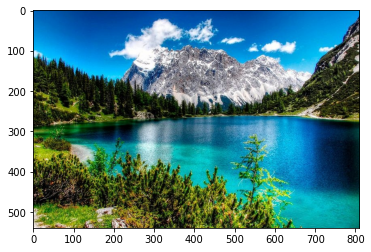

In [ ]:
original_img = rebuild_image(img_r, img_g, img_b)
print(original_img[:1])
plt.imshow(original_img / 255)

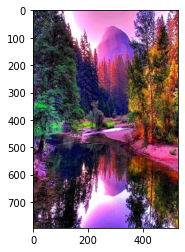

In [ ]:
img_r = cv2.imread('/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/Lab1/imagen2/imagen2_salida_gray_rojo.jpg',0)
img_g = cv2.imread('/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/Lab1/imagen2/imagen2_salida_gray_verde.jpg',0)
img_b = cv2.imread('/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/Lab1/imagen2/imagen2_salida_gray_azul.jpg',0)
original_img = rebuild_image(img_r, img_g, img_b)
plt.imshow(original_img / 255)

## Problema 3

In [ ]:
def get_image_in_gray_scale(img):
  alto = img.shape[0]
  ancho = img.shape[1]
  gray_green = np.zeros((alto, ancho))
  gray_blue = np.zeros((alto, ancho))
  gray_red = np.zeros((alto, ancho))
  for i in range(0, alto):
    for j in range(0, ancho):
        gray_red[i,j], gray_green[i,j], gray_blue[i,j] = img[i,j]
  return gray_red, gray_green, gray_blue

        

(1122, 1994, 3)


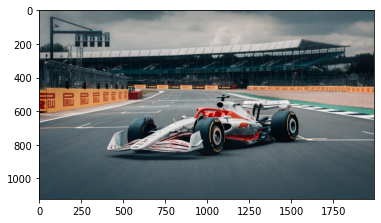

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/Lab1/f1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

In [ ]:
img_gr, img_gg, img_gb = get_image_in_gray_scale(img)

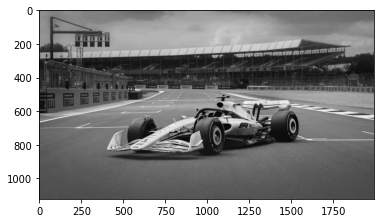

In [ ]:
## Gray Blue Scale
plt.imshow(img_gb, cmap="gray")


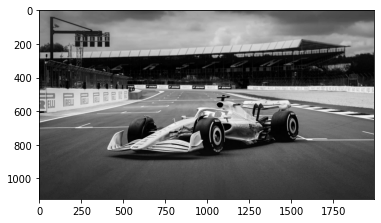

In [ ]:
## Gray Red Scale
plt.imshow(img_gr, cmap="gray")


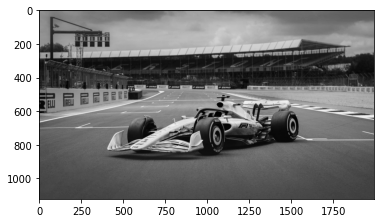

In [ ]:
## Gray Green Scale
plt.imshow(img_gg, cmap="gray")

## Problema 4

In [ ]:
def get_histograms(img):
  red, green, blue = get_image_in_gray_scale(img)
  gray_scale = (0.299 * blue  + 0.587 * green + 0.114 * red).astype(int)
  red, green, blue, gray_scale = red.reshape(-1, 1), green.reshape(-1,1), blue.reshape(-1,1), gray_scale.reshape(-1,1)
  fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
  axs[0, 0].hist(red, color="red")
  axs[0, 0].axvline(np.mean(red), color='purple', lw=2, ls='--', label="average plot")
  axs[0, 1].hist(green, color="green")
  axs[0, 1].axvline(np.mean(green), color='purple', lw=2, ls='--', label="average plot")
  axs[1, 0].hist(blue, color="blue")
  axs[1, 0].axvline(np.mean(blue), color='purple', lw=2, ls='--', label="average plot")
  axs[1, 1].hist(gray_scale, color="gray")
  axs[1, 1].axvline(np.mean(gray_scale), color='purple', lw=3, ls='--', label="average plot")



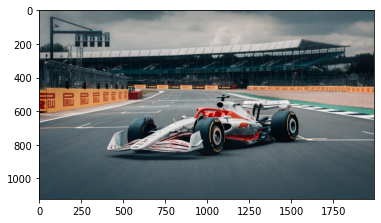

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Cursos/Data Science/Ciclo3/Text Mining and Image Processing/Lab1/f1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

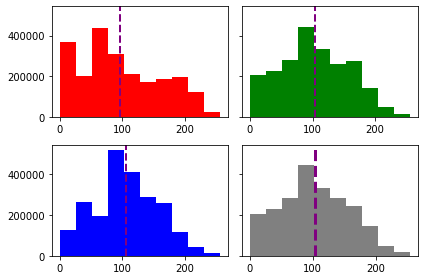

In [ ]:
get_histograms(img)

## Problema 5

### Conversión de Escala de Grises Ponderado

El método de escala de grises ponderado (tambien llamada metodo de luminosidad), le da un peso distinto a cada uno de los canales. 

Una implementación de este método es el siguiente:

> Grayscale  = 0.299R + 0.587G + 0.114B



El metodo de luminosidad es un método mas sofisticado que el metodo de promediar el valor de las componentes. Este metodo toma en cuenta la percepcion humana de los diferentes canales. Los humanos somos mas sensibles al color verde que a los demas colores, por eso se le asigna un mayor peso.

Existen metodos mas complejos para combinar los 3 canales que buscan mantener las resolucion y mantener la mayor cantidad de informacion de detalle visual en un solo canal. 

Por ejemplo, el metod de converion a escala de grises ponderado con fusion de canales multiresolucion. Es un metodo que busca mediante el uso de un algoritmo de pesos en forma de piramide combinar los 3 canales en una imagen a escala de grises manteniendo la resolucion y detalle de la imagen original. (Wu, T & Toet, A; 2014)


### Bibliografia

[Three Algorithms for Converting color to Grayscale](https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/#:~:text=The%20luminosity%20method%20is%20a,%2B%200.72%20G%20%2B%200.07%20B.)

[Image Processing 101: Color Space Conversion](https://www.dynamsoft.com/blog/insights/image-processing/image-processing-101-color-space-conversion/)

Wu, T., & Toet, A. (2014). Color-to-grayscale conversion through weighted multiresolution channel fusion. Journal of Electronic Imaging, 23(4), 043004.



In [ ]:
def gray_scale_weighted(img, weights=[0.114, 0.587, 0.229]):
  #(1024,1980,3) matmul (3,1)
  weights = np.array(weights).reshape(3,1)
  print(img.shape, weights.shape)
  gray_scale = np.matmul(img, weights).astype(int)
  print(gray_scale.shape)
  return gray_scale

(1122, 1994, 3) (3, 1)
(1122, 1994, 1)


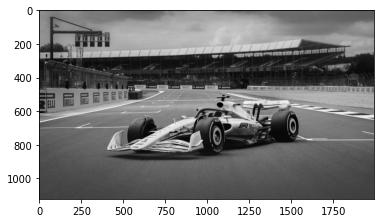

In [ ]:
img_gray = gray_scale_weighted(img)

plt.imshow(img_gray[:,:,0], cmap="gray")

## Problema 6

### HSV

El color del espacio HSV viene compuesto por 3 canales al igual que el RGB. Pero a diferencia del espacio RGB, los canales representan Matiz (Hue), Saturacion y Valor. 

Se asemeja al modelo HSL. HSL es otro modelo que mezcla 3 componentes para generar un espacio de colores. Estos dos modelos se basan en la idea que normalmente no hablamos de los colores como la mezcla de las 3 componentes de RGB (aunque asi sea como nuestros ojos perciban la luz de los colores). Estos modelos se basan en la idea que cuando hablamos de colores normalmente comparamos entre tonos o matices, o ser mas claros o oscuros que otros. HSL es un metodo que trata de modelar esa percepcion que tenemos del color. La componente que difiere con HSV es la de claridad (lightness). El espacio de este modelo se representa como una figura conica. Ya que la componete de luminosidad en el punto medio tiene los colores saturados en el circulo externo. Y 1 significa luminosidad completa, 0 es la ausencia de luminosidad. 

En el modelo HSV, la representaicon del espacio de color es un cono invertido. La tercera componente es el valor que a veces se intercambia por brillo. Esta toma valores entre 0 y 1, siendo 0 la representacion de ausencia de brillo, pot lo tanto representando el color negro 

La conversion entre el espacio RGB y el HSV toma en cuenta que las componentes en el segundo modelo no forman un cubo a comparacion del RGB. La componente de Matiz es un angulo en el modelo conico HSV (de forma similar en el HSL). Hue se calcula en radianes. Y la forma en que se calcula es una funcion que depende del valor entero de la Matiz en radianes. 

Método para convertir de HSV a RGB: 
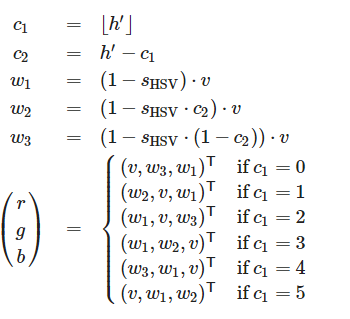


### Bibliografia

[HSV](http://color.lukas-stratmann.com/color-systems/hsv.html)